In [132]:
import pandas as pd

In [133]:
df_train=pd.read_csv("D:\CHITRA\GUIDE_Train.csv",low_memory=False, nrows=1000000)

In [134]:
pd.set_option("display.max_columns",None)

In [135]:
df_train.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,NaN,NaN,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [136]:
df=df_train.copy()

In [137]:
df["Id"].unique()

array([ 180388628218,  455266534868, 1056561957389, ..., 1168231107943,
       1271310324031,   94489284652], dtype=int64)

In [138]:
df.isnull().sum()

Id                         0
OrgId                      0
IncidentId                 0
AlertId                    0
Timestamp                  0
DetectorId                 0
AlertTitle                 0
Category                   0
MitreTechniques       574909
IncidentGrade           5289
ActionGrouped         994200
ActionGranular        994200
EntityType                 0
EvidenceRole               0
DeviceId                   0
Sha256                     0
IpAddress                  0
Url                        0
AccountSid                 0
AccountUpn                 0
AccountObjectId            0
AccountName                0
DeviceName                 0
NetworkMessageId           0
EmailClusterId        989733
RegistryKey                0
RegistryValueName          0
RegistryValueData          0
ApplicationId              0
ApplicationName            0
OAuthApplicationId         0
ThreatFamily          992230
FileName                   0
FolderPath                 0
ResourceIdName

In [139]:

# Create an empty dictionary to store the percentage of null values for each column
null_percentage = {}

# Iterate over each column in the DataFrame
for col in df.columns:
    # Calculate the percentage of null values for the column
    percentage = (df[col].isnull().sum() / len(df)) * 100
    # Store the result in the dictionary
    null_percentage[col] = percentage

# Convert the dictionary to a DataFrame 
null_percentage_df = pd.DataFrame(list(null_percentage.items()), columns=['Column', 'Null Percentage'])

# Display the DataFrame
print(null_percentage_df)

                Column  Null Percentage
0                   Id           0.0000
1                OrgId           0.0000
2           IncidentId           0.0000
3              AlertId           0.0000
4            Timestamp           0.0000
5           DetectorId           0.0000
6           AlertTitle           0.0000
7             Category           0.0000
8      MitreTechniques          57.4909
9        IncidentGrade           0.5289
10       ActionGrouped          99.4200
11      ActionGranular          99.4200
12          EntityType           0.0000
13        EvidenceRole           0.0000
14            DeviceId           0.0000
15              Sha256           0.0000
16           IpAddress           0.0000
17                 Url           0.0000
18          AccountSid           0.0000
19          AccountUpn           0.0000
20     AccountObjectId           0.0000
21         AccountName           0.0000
22          DeviceName           0.0000
23    NetworkMessageId           0.0000


In [140]:
# List of columns to drop having null above 50%
columns_to_drop = ["LastVerdict",'SuspicionLevel','AntispamDirection','Roles','ResourceType','ThreatFamily','EmailClusterId',
                  'ActionGranular','ActionGrouped','MitreTechniques']
# Drop the columns
df= df.drop(columns=columns_to_drop)

In [141]:
# Dropping columns that contain unique identifiers, cryptographic hashes, file paths, 
# and resource identifiers, as well as redundant or inconsistent data, 
# which are irrelevant for analysis or modeling purposes.
df = df.drop(columns=['Id', 'IncidentId', 'AlertId', 'DeviceId', 'Sha256', 'IpAddress', 'Url',
                      'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
                      'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData',
                      'ApplicationId', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName'])

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   OrgId            1000000 non-null  int64 
 1   Timestamp        1000000 non-null  object
 2   DetectorId       1000000 non-null  int64 
 3   AlertTitle       1000000 non-null  int64 
 4   Category         1000000 non-null  object
 5   IncidentGrade    994711 non-null   object
 6   EntityType       1000000 non-null  object
 7   EvidenceRole     1000000 non-null  object
 8   ApplicationName  1000000 non-null  int64 
 9   OSFamily         1000000 non-null  int64 
 10  OSVersion        1000000 non-null  int64 
 11  CountryCode      1000000 non-null  int64 
 12  State            1000000 non-null  int64 
 13  City             1000000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 106.8+ MB


In [143]:
#removing null values rows in incidentgrade
df.dropna(subset=['IncidentGrade'], inplace=True)

In [144]:
df.duplicated().sum()

284857

In [145]:
df.drop_duplicates()

,OrgId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,OSVersion,CountryCode,State,City
0,0,2024-06-04T06:05:15.000Z,7,6,InitialAccess,TruePositive,Ip,Related,3421,5,66,31,6,3
1,88,2024-06-14T03:01:25.000Z,58,43,Exfiltration,FalsePositive,User,Impacted,3421,5,66,242,1445,10630
2,809,2024-06-13T04:52:55.000Z,423,298,InitialAccess,FalsePositive,Url,Related,3421,5,66,242,1445,10630
3,92,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,BenignPositive,Url,Related,3421,5,66,242,1445,10630
4,148,2024-06-15T01:08:07.000Z,9,74,Execution,TruePositive,User,Impacted,3421,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,0,2024-06-07T09:28:08.000Z,4,3,InitialAccess,TruePositive,CloudLogonRequest,Related,3421,5,66,242,1445,10630
999994,52,2024-06-05T23:40:08.000Z,229,204,InitialAccess,BenignPositive,Machine,Impacted,3421,5,66,242,1445,10630
999996,24,2024-06-06T02:37:33.000Z,5,21,SuspiciousActivity,TruePositive,Ip,Related,3421,5,66,242,1445,10630
999997,1996,2024-06-06T00:53:26.000Z,782,223,InitialAccess,TruePositive,Ip,Related,3421,5,66,1,0,0


In [146]:
df = df.reset_index(drop=True)

In [147]:
# Convert to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract features
df['HourOfDay'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['MonthOfYear'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year
df['IsWeekend'] = df['Timestamp'].dt.dayofweek >= 5

In [148]:
df= df.drop(columns="Timestamp")

In [149]:
df.dtypes

OrgId               int64
DetectorId          int64
AlertTitle          int64
Category           object
IncidentGrade      object
EntityType         object
EvidenceRole       object
ApplicationName     int64
OSFamily            int64
OSVersion           int64
CountryCode         int64
State               int64
City                int64
HourOfDay           int32
DayOfWeek           int32
MonthOfYear         int32
Year                int32
IsWeekend            bool
dtype: object

In [150]:
df['IsWeekend'] = df['IsWeekend'].astype(int)

In [151]:
df["OSFamily"].unique()

array([5, 0, 2, 1], dtype=int64)

In [152]:
df.OSFamily.value_counts()

OSFamily
5    974615
0     19625
1       314
2       157
Name: count, dtype: int64

In [153]:
df.columns

Index(['OrgId', 'DetectorId', 'AlertTitle', 'Category', 'IncidentGrade',
       'EntityType', 'EvidenceRole', 'ApplicationName', 'OSFamily',
       'OSVersion', 'CountryCode', 'State', 'City', 'HourOfDay', 'DayOfWeek',
       'MonthOfYear', 'Year', 'IsWeekend'],
      dtype='object')

In [154]:
# Summary statistics for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'int32'])
numerical_cols.describe()

,OrgId,DetectorId,AlertTitle,ApplicationName,OSFamily,OSVersion,CountryCode,State,City,HourOfDay,DayOfWeek,MonthOfYear,Year,IsWeekend
count,994711.000000,994711.000000,994711.000000,994711.000000,994711.000000,994711.000000,994711.000000,994711.000000,994711.000000,994711.000000,994711.000000,994711.000000,994711.000000,994711.000000
mean,177.396643,105.633760,2760.244396,3341.636895,4.899617,64.669503,223.623859,1351.201229,9934.271856,12.152967,2.498679,5.909463,2023.999983,0.170914
std,373.468550,415.138324,10853.812592,513.937634,0.699735,9.267401,62.881683,351.544588,2610.295049,6.783808,1.867664,0.289884,0.004134,0.376434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000,0.000000
25%,10.000000,2.000000,2.000000,3421.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,6.000000,1.000000,6.000000,2024.000000,0.000000
50%,44.000000,9.000000,11.000000,3421.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,13.000000,2.000000,6.000000,2024.000000,0.000000
75%,169.000000,45.000000,172.000000,3421.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,18.000000,4.000000,6.000000,2024.000000,0.000000
max,6144.000000,9487.000000,113168.000000,3421.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,23.000000,6.000000,12.000000,2024.000000,1.000000


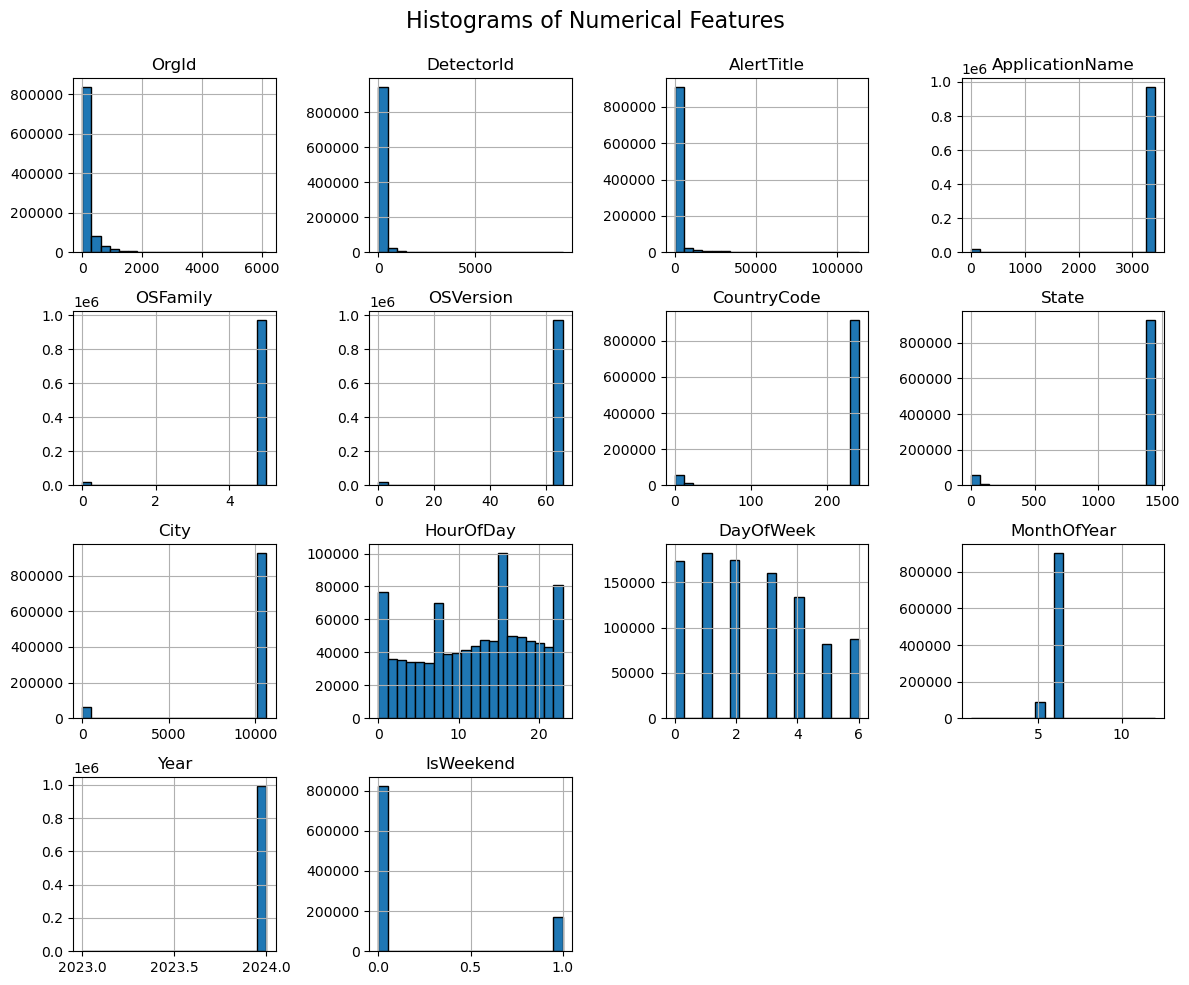

In [155]:
# Select only numerical columns (int64, int32)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each numerical column
numerical_cols.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

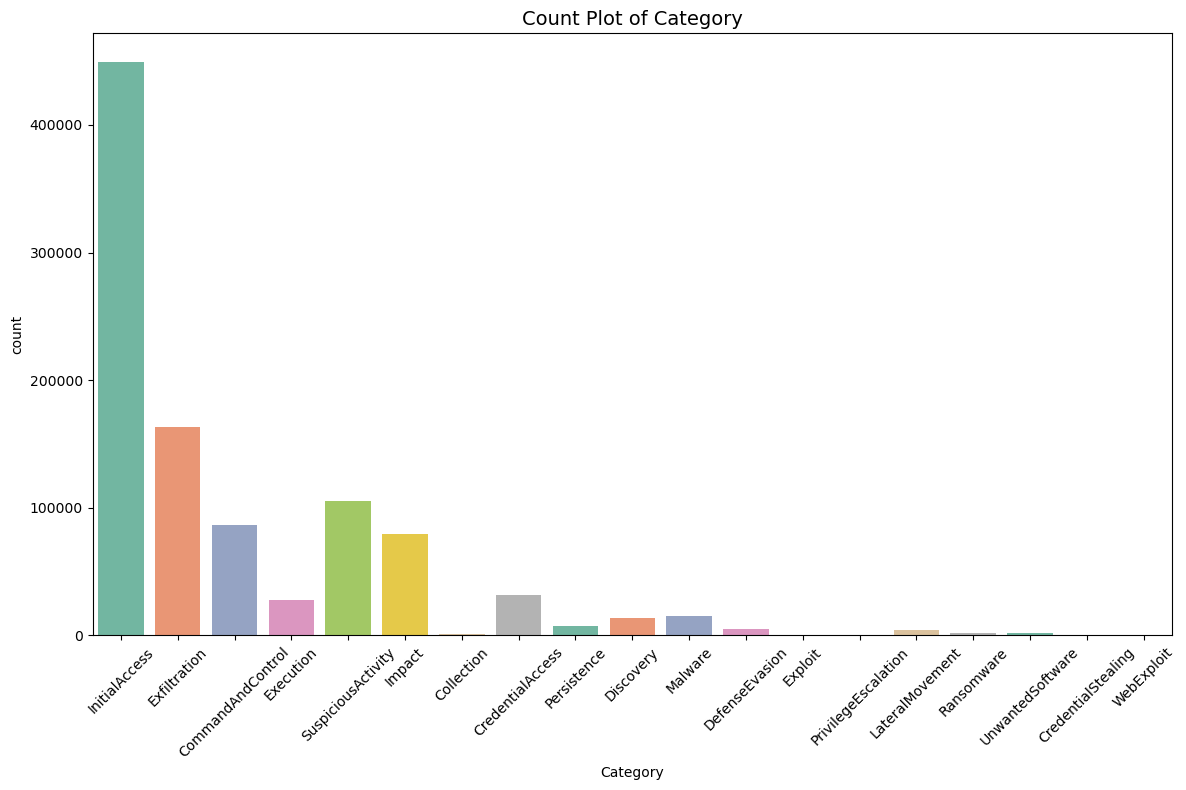

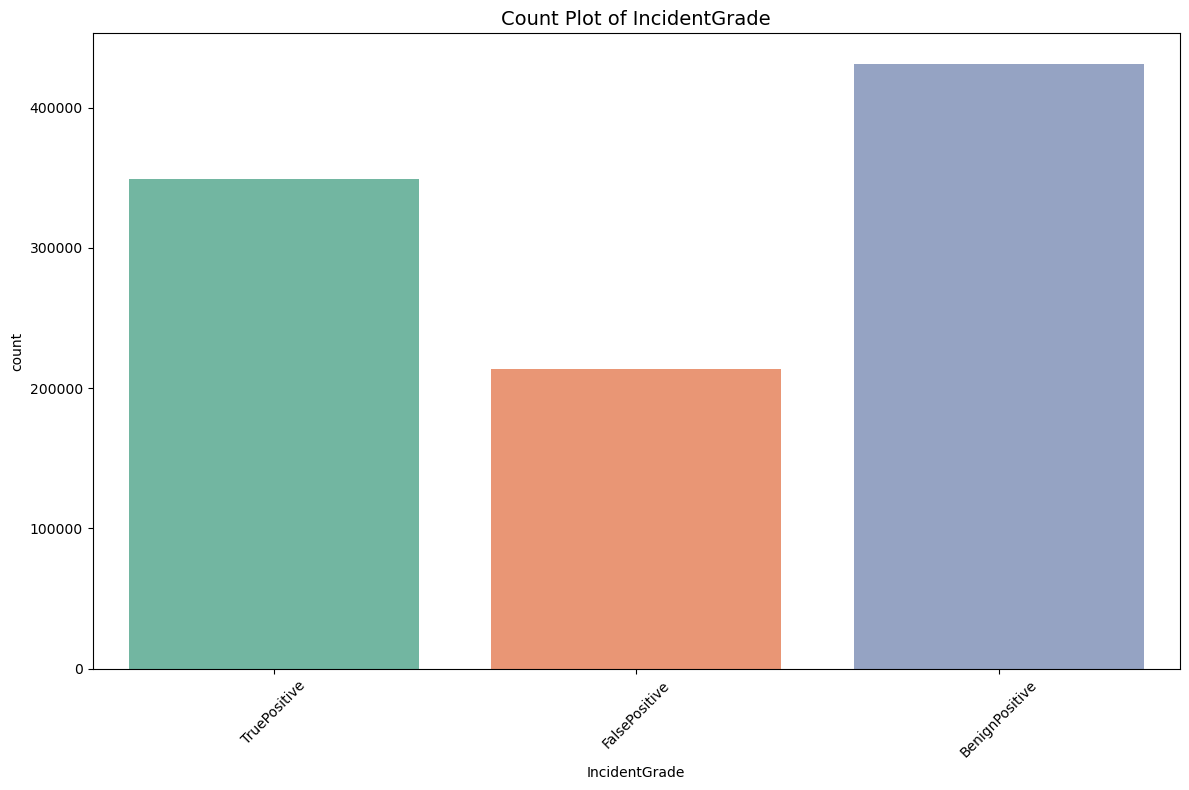

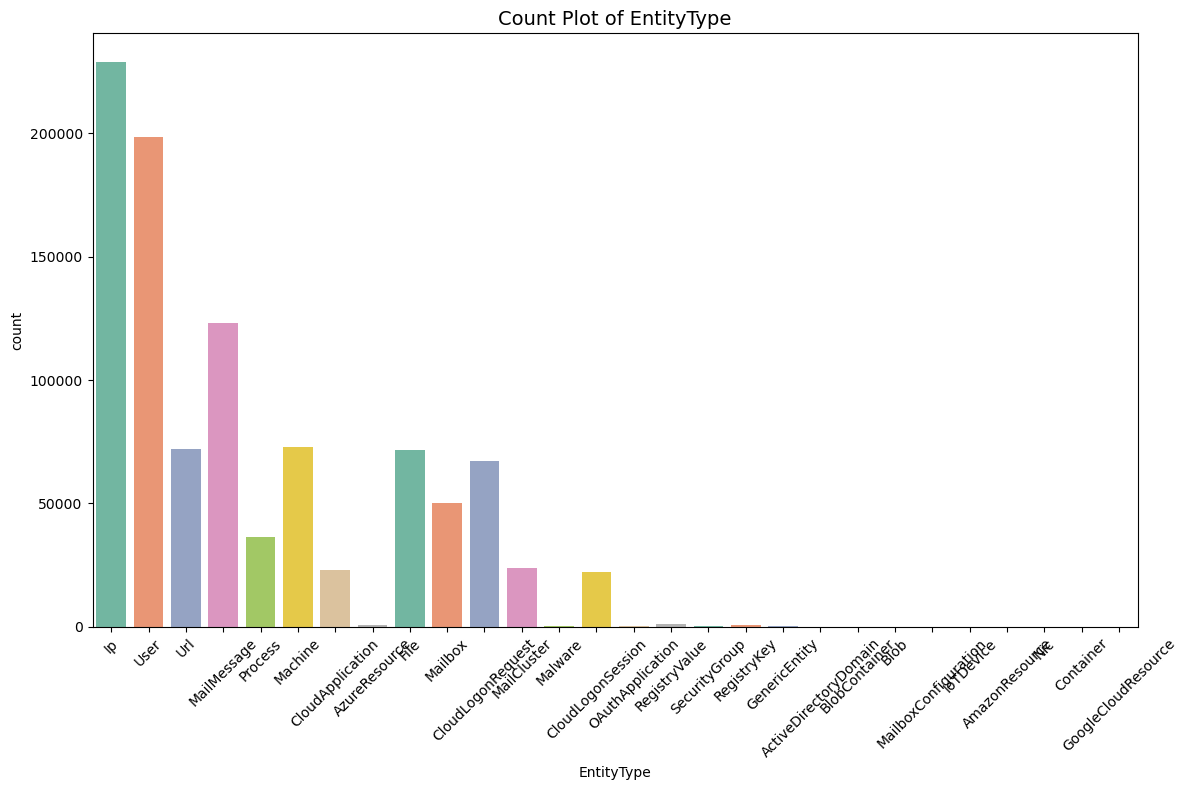

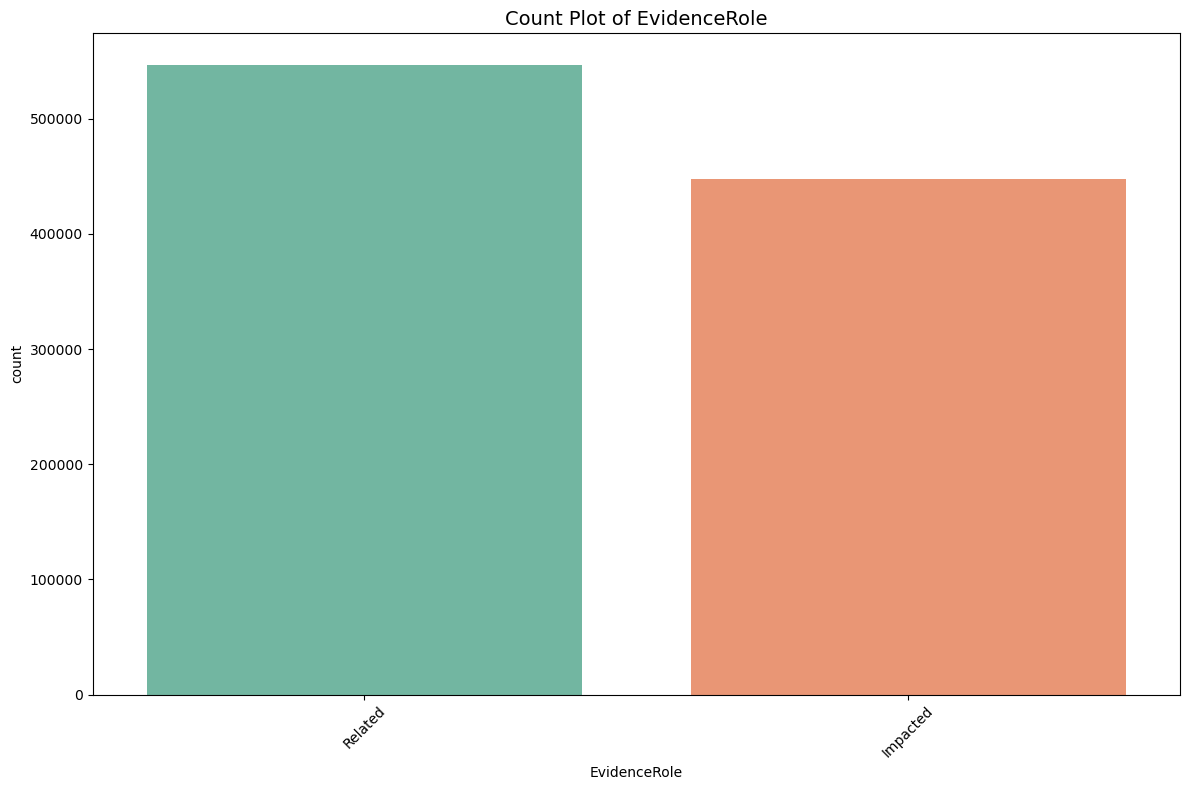

In [156]:
# Select categorical columns (object)
categorical_cols = df.select_dtypes(include=['object'])

# Plot count plots for each categorical column
for col in categorical_cols.columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count Plot of {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


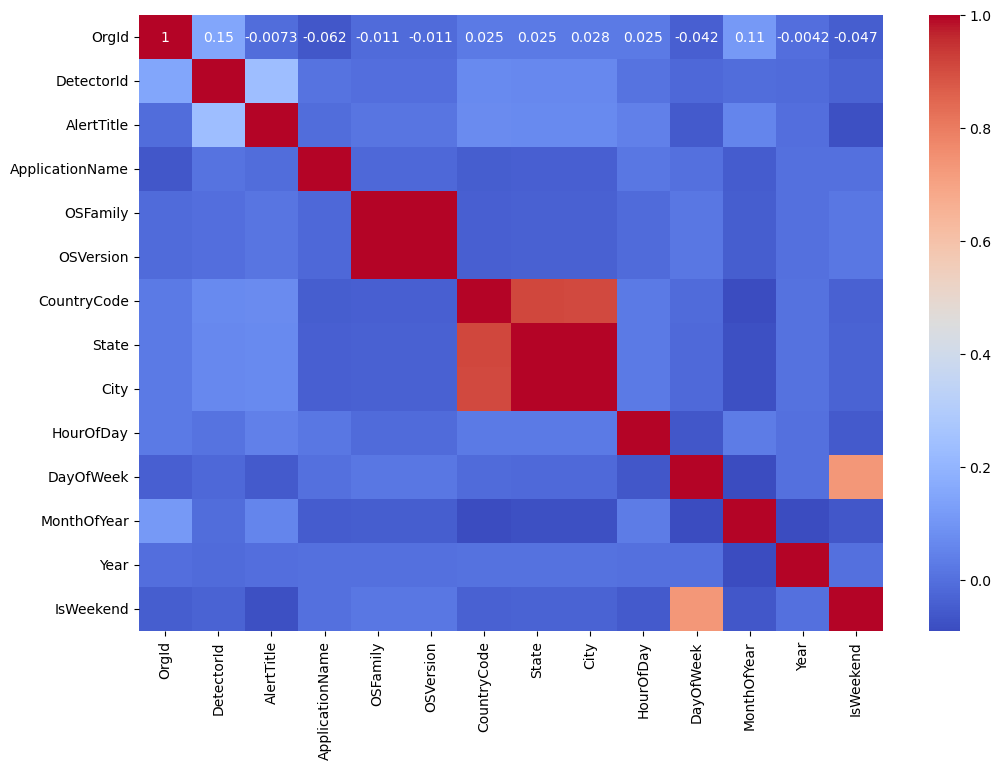

In [157]:
# Correlation matrix
correlation_matrix = numerical_cols.corr()

# Heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [158]:
# Detecting outliers using IQR
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))).sum()
print("Outliers in each column:\n", outliers)


Outliers in each column:
 OrgId              120464
DetectorId         142839
AlertTitle         197012
ApplicationName     23261
OSFamily            20096
OSVersion           20096
CountryCode         78582
State               66335
City                66398
HourOfDay               0
DayOfWeek               0
MonthOfYear         89937
Year                   17
IsWeekend          170010
dtype: int64


In [159]:
import pandas as pd

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out rows with outliers
df_cleaned = df[~((numerical_cols < lower_bound) | (numerical_cols > upper_bound)).any(axis=1)]

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_cleaned.shape}")


Original dataset shape: (994711, 18)
Dataset shape after removing outliers: (400948, 18)


In [160]:
categorical_cols

,Category,IncidentGrade,EntityType,EvidenceRole
0,InitialAccess,TruePositive,Ip,Related
1,Exfiltration,FalsePositive,User,Impacted
2,InitialAccess,FalsePositive,Url,Related
3,CommandAndControl,BenignPositive,Url,Related
4,Execution,TruePositive,User,Impacted
...,...,...,...,...
994706,InitialAccess,BenignPositive,Machine,Impacted
994707,SuspiciousActivity,TruePositive,Ip,Related
994708,InitialAccess,TruePositive,Ip,Related
994709,InitialAccess,FalsePositive,CloudLogonSession,Related


In [161]:
df["EvidenceRole"].unique()

array(['Related', 'Impacted'], dtype=object)

In [162]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Define columns to encode
columns_to_encode = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

# Initialize LabelEncoders for each column
le_dict = {col: LabelEncoder() for col in columns_to_encode}

# Apply Label Encoding to each column
for col in columns_to_encode:
    df[col] = le_dict[col].fit_transform(df[col])

print(df)


        OrgId  DetectorId  AlertTitle  Category  IncidentGrade  EntityType  \
0           0           7           6        10              2          13   
1          88          58          43         7              1          27   
2         809         423         298        10              1          26   
3          92           2           2         1              0          26   
4         148           9          74         6              2          27   
...       ...         ...         ...       ...            ...         ...   
994706      4           8           7        10              0          14   
994707     24           5          21        16              2          13   
994708   1996         782         223        10              2          13   
994709     11           0           0        10              1           7   
994710    215        1159         105         7              0          27   

        EvidenceRole  ApplicationName  OSFamily  OSVersion  Cou

In [163]:
df.dtypes

OrgId              int64
DetectorId         int64
AlertTitle         int64
Category           int32
IncidentGrade      int32
EntityType         int32
EvidenceRole       int32
ApplicationName    int64
OSFamily           int64
OSVersion          int64
CountryCode        int64
State              int64
City               int64
HourOfDay          int32
DayOfWeek          int32
MonthOfYear        int32
Year               int32
IsWeekend          int32
dtype: object

In [164]:
df.corr()

,OrgId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,OSVersion,CountryCode,State,City,HourOfDay,DayOfWeek,MonthOfYear,Year,IsWeekend
OrgId,1.000000,0.149607,-0.007255,0.078816,-0.014084,0.018165,0.009741,-0.062171,-0.010967,-0.011493,0.025246,0.025386,0.027688,0.024993,-0.041743,0.111402,-0.004245,-0.047079
DetectorId,0.149607,1.000000,0.235977,-0.057935,-0.117527,0.041770,-0.077440,0.008262,-0.004612,-0.004951,0.069560,0.063650,0.063340,0.010832,-0.021971,-0.007666,-0.009937,-0.032770
AlertTitle,-0.007255,0.235977,1.000000,-0.094270,-0.138995,-0.005383,-0.205234,-0.008346,0.012788,0.012688,0.074057,0.067603,0.067503,0.044078,-0.053586,0.056756,-0.001888,-0.081644
Category,0.078816,-0.057935,-0.094270,1.000000,0.176160,-0.120029,0.043289,-0.130082,0.182460,0.182149,-0.060489,-0.051074,-0.050923,-0.039041,0.020573,0.035025,-0.001019,0.038913
IncidentGrade,-0.014084,-0.117527,-0.138995,0.176160,1.000000,-0.104614,0.158238,-0.003171,0.064704,0.064718,-0.291214,-0.266773,-0.267687,-0.056818,0.025767,-0.004614,-0.002867,0.074294
EntityType,0.018165,0.041770,-0.005383,-0.120029,-0.104614,1.000000,-0.350641,0.252147,0.054780,0.054822,0.152953,0.139652,0.139502,0.015944,-0.033876,0.114393,0.001407,-0.027522
EvidenceRole,0.009741,-0.077440,-0.205234,0.043289,0.158238,-0.350641,1.000000,0.158398,0.158522,0.158642,-0.264464,-0.241465,-0.241205,-0.046254,0.076008,-0.149163,-0.000320,0.110636
ApplicationName,-0.062171,0.008262,-0.008346,-0.130082,-0.003171,0.252147,0.158398,1.000000,-0.022153,-0.022170,-0.045127,-0.041203,-0.041158,0.018028,-0.000523,-0.048101,0.000979,0.001372
OSFamily,-0.010967,-0.004612,0.012788,0.182460,0.064704,0.054780,0.158522,-0.022153,1.000000,0.999249,-0.041923,-0.038278,-0.038236,-0.010316,0.017109,-0.044339,-0.000593,0.018061
OSVersion,-0.011493,-0.004951,0.012688,0.182149,0.064718,0.054822,0.158642,-0.022170,0.999249,1.000000,-0.041955,-0.038307,-0.038265,-0.010438,0.017254,-0.044371,-0.000594,0.018187


In [166]:
import pandas as pd
import numpy as np
from scipy import stats


# Automatically detect numerical columns
columns = df.select_dtypes(include=[np.int32, np.int64, np.float64]).columns

# Calculate Z-scores and identify outliers
outlier_flags = np.zeros(df.shape[0], dtype=bool)

for col in columns:
    z_scores = stats.zscore(df[col])
    outlier_flags |= np.abs(z_scores) > 3
    print(f"Column: {col}")
    print(f"Number of outliers: {np.sum(np.abs(z_scores) > 3)}")

# Remove outliers from the dataframe
df_cleaned = df[~outlier_flags]

print(f"Original size: {len(df)}")
print(f"Filtered size: {len(df_cleaned)}")


Column: OrgId
Number of outliers: 21790
Column: DetectorId
Number of outliers: 15704
Column: AlertTitle
Number of outliers: 25776
Column: Category
Number of outliers: 0
Column: IncidentGrade
Number of outliers: 0
Column: EntityType
Number of outliers: 0
Column: EvidenceRole
Number of outliers: 0
Column: ApplicationName
Number of outliers: 23139
Column: OSFamily
Number of outliers: 20096
Column: OSVersion
Number of outliers: 20091
Column: CountryCode
Number of outliers: 73574
Column: State
Number of outliers: 65135
Column: City
Number of outliers: 64737
Column: HourOfDay
Number of outliers: 0
Column: DayOfWeek
Number of outliers: 0
Column: MonthOfYear
Number of outliers: 89937
Column: Year
Number of outliers: 17
Column: IsWeekend
Number of outliers: 0
Original size: 994711
Filtered size: 732696


In [121]:
df.shape

(994711, 36)

In [122]:
df1.shape

(732696, 18)

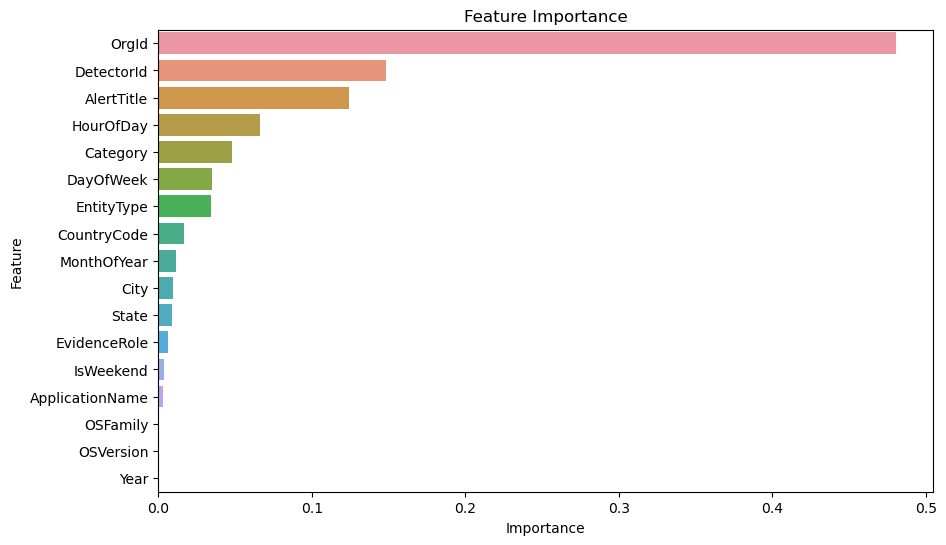

In [165]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Separate features and target
X = df.drop(columns='IncidentGrade')
y = df['IncidentGrade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


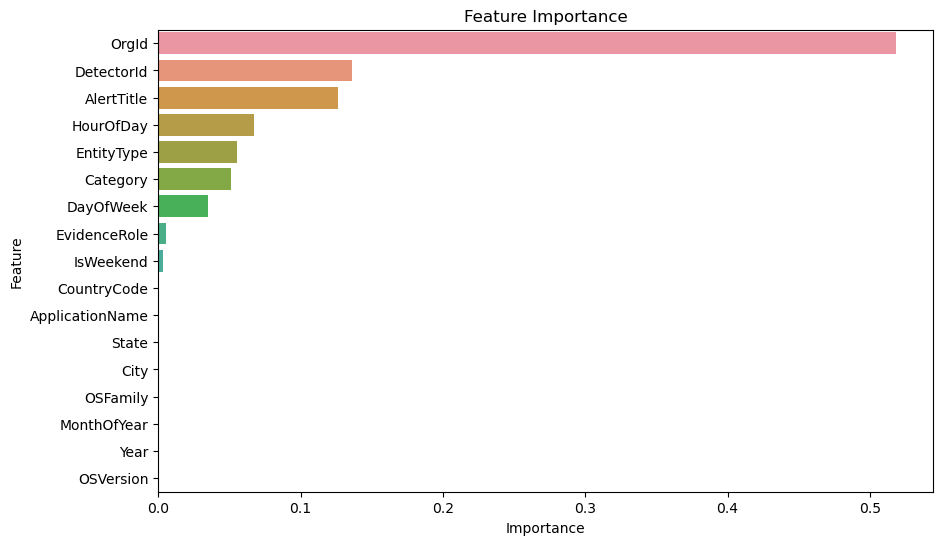

In [167]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Separate features and target
X = df_cleaned.drop(columns='IncidentGrade')
y = df_cleaned['IncidentGrade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [172]:
from sklearn.model_selection import train_test_split
X_train = df_cleaned.drop('IncidentGrade', axis=1)
y_train = df_cleaned['IncidentGrade']  # Target

In [170]:
# Stratified split to handle potential imbalance
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)

Training set shape: (586156, 17) (586156,)
Validation set shape: (146540, 17) (146540,)


In [174]:
from sklearn.model_selection import train_test_split

# Assuming df_cleaned is your DataFrame after cleaning
X_train = df_cleaned.drop('IncidentGrade', axis=1)
y_train = df_cleaned['IncidentGrade']

# Split data into training and validation sets
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

print("Training set shape:", X_train_split.shape, y_train_split.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)


Training set shape: (586156, 17) (586156,)
Validation set shape: (146540, 17) (146540,)


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the baseline model
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train_split, y_train_split)

# Predict on validation set
y_pred_valid_baseline = baseline_model.predict(X_valid)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred_valid_baseline)

# Evaluate the baseline model
print("Baseline Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_valid_baseline))


Baseline Model Evaluation:
Accuracy: 0.4725

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.98      0.64     69148
           1       0.33      0.05      0.08     29225
           2       0.89      0.00      0.00     48167

    accuracy                           0.47    146540
   macro avg       0.57      0.34      0.24    146540
weighted avg       0.58      0.47      0.32    146540



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_split, y_train_split)

# Predict on validation set
y_pred_valid_decision_tree = decision_tree_model.predict(X_valid)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred_valid_decision_tree)

# Evaluate the Decision Tree model
print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_valid_decision_tree))


Decision Tree Model Evaluation:
Accuracy: 0.9674

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     69148
           1       0.95      0.94      0.94     29225
           2       0.97      0.97      0.97     48167

    accuracy                           0.97    146540
   macro avg       0.96      0.96      0.96    146540
weighted avg       0.97      0.97      0.97    146540



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize and train the advanced model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_split, y_train_split)

# Predict on validation set
y_pred_valid_rf = rf_model.predict(X_valid)

# Evaluate the advanced model
print("Random Forest Model Evaluation:")
print(classification_report(y_valid, y_pred_valid_rf))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search.fit(X_train_split, y_train_split)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Predict on validation set with the best model
y_pred_valid_best_rf = best_rf_model.predict(X_valid)
print("Best Random Forest Model Evaluation:")
print(classification_report(y_valid, y_pred_valid_best_rf))


In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the baseline Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_split, y_train_split)

# Predict on validation set
y_pred_valid_rf = rf_model.predict(X_valid)

# Evaluate the baseline Random Forest model
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_valid_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_valid_rf))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search.fit(X_train_split, y_train_split)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Predict on validation set with the best model
y_pred_valid_best_rf = best_rf_model.predict(X_valid)
print("Best Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_valid_best_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_valid_best_rf))


Random Forest Model Evaluation:
Accuracy: 0.9251

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     69148
           1       0.90      0.88      0.89     29225
           2       0.92      0.92      0.92     48167

    accuracy                           0.93    146540
   macro avg       0.92      0.92      0.92    146540
weighted avg       0.92      0.93      0.92    146540

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Model Evaluation:
Accuracy: 0.9284

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     69148
           1       0.91      0.88      0.90     29225
           2       0.93      0.92      0.93     48167

    accuracy                           0.93    146540
   macro avg       0.93      0.92      0.92    14654

In [179]:
#test data

In [180]:
test_data = pd.read_csv("C:/Users/ASUS/Downloads/GUIDE_Test.csv (1)/GUIDE_Test.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7572\1117021433.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv("C:/Users/ASUS/Downloads/GUIDE_Test.csv (1)/GUIDE_Test.csv")


In [181]:
test_data.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [182]:
dfte=test_data.copy()

In [183]:
# List of columns to drop having null above 50%
columns_to_drop = ["LastVerdict",'SuspicionLevel','AntispamDirection','Roles','ResourceType','ThreatFamily','EmailClusterId',
                  'ActionGranular','ActionGrouped','MitreTechniques']
# Drop the columns
test_data= test_data.drop(columns=columns_to_drop)

In [184]:
# Dropping columns that contain unique identifiers, cryptographic hashes, file paths, 
# and resource identifiers, as well as redundant or inconsistent data, 
# which are irrelevant for analysis or modeling purposes.
test_data = test_data.drop(columns=['Id', 'IncidentId', 'AlertId', 'DeviceId', 'Sha256', 'IpAddress', 'Url',
                      'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
                      'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData',
                      'ApplicationId', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName'])

In [185]:
test_data.duplicated().sum()

1880710

In [186]:
test_data.drop_duplicates()

,OrgId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,OSVersion,CountryCode,State,City,Usage
0,657,2024-06-04T22:56:27.000Z,524,563,LateralMovement,BenignPositive,User,Impacted,3421,5,66,242,1445,10630,Private
1,3,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,BenignPositive,Machine,Impacted,3421,0,0,242,1445,10630,Public
2,145,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,BenignPositive,Process,Related,3421,5,66,242,1445,10630,Public
3,222,2024-06-12T12:07:31.000Z,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,3421,5,66,242,1445,10630,Public
4,363,2024-06-06T17:42:05.000Z,27,18,Discovery,BenignPositive,User,Impacted,3421,5,66,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147979,11,2024-06-07T12:11:23.000Z,4,3,InitialAccess,TruePositive,User,Impacted,3421,5,66,242,1445,10630,Public
4147981,134,2024-06-05T09:44:51.000Z,1,1,InitialAccess,BenignPositive,User,Impacted,3421,5,66,242,1445,10630,Public
4147985,42,2024-06-03T20:24:41.000Z,135,7322,Malware,BenignPositive,Machine,Impacted,3421,0,0,242,1445,10630,Public
4147987,262,2024-06-04T03:53:15.000Z,139,120,InitialAccess,BenignPositive,User,Impacted,3421,5,66,242,1445,10630,Public


In [187]:
# Convert to datetime
test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'])

# Extract features
test_data['HourOfDay'] = test_data['Timestamp'].dt.hour
test_data['DayOfWeek'] = test_data['Timestamp'].dt.dayofweek
test_data['MonthOfYear'] = test_data['Timestamp'].dt.month
test_data['Year'] = test_data['Timestamp'].dt.year
test_data['IsWeekend'] = test_data['Timestamp'].dt.dayofweek >= 5

In [188]:
test_data= test_data.drop(columns="Timestamp")

In [189]:
test_data['IsWeekend'] = test_data['IsWeekend'].astype(int)

In [190]:
test_data.isnull().sum()

OrgId              0
DetectorId         0
AlertTitle         0
Category           0
IncidentGrade      0
EntityType         0
EvidenceRole       0
ApplicationName    0
OSFamily           0
OSVersion          0
CountryCode        0
State              0
City               0
Usage              0
HourOfDay          0
DayOfWeek          0
MonthOfYear        0
Year               0
IsWeekend          0
dtype: int64

In [191]:
test_data.dtypes

OrgId               int64
DetectorId          int64
AlertTitle          int64
Category           object
IncidentGrade      object
EntityType         object
EvidenceRole       object
ApplicationName     int64
OSFamily            int64
OSVersion           int64
CountryCode         int64
State               int64
City                int64
Usage              object
HourOfDay           int32
DayOfWeek           int32
MonthOfYear         int32
Year                int32
IsWeekend           int32
dtype: object

In [192]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Define columns to encode
columns_to_encode = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

# Initialize LabelEncoders for each column
le_dict = {col: LabelEncoder() for col in columns_to_encode}

# Apply Label Encoding to each column
for col in columns_to_encode:
    test_data[col] = le_dict[col].fit_transform(test_data[col])

print(test_data)


         OrgId  DetectorId  AlertTitle  Category  IncidentGrade  EntityType  \
0          657         524         563        11              0          28   
1            3           2           2         1              0          15   
2          145        2932       10807        11              0          23   
3          222           0           0        10              1           7   
4          363          27          18         5              0          28   
...        ...         ...         ...       ...            ...         ...   
4147987    262         139         120        10              0          28   
4147988   1323         219         196        10              0          28   
4147989     47          57          29         1              1          12   
4147990     70           1           1        10              0          18   
4147991    227           1           1        10              2          18   

         EvidenceRole  ApplicationName  OSFamily  O

In [193]:
test_data["Usage"].unique()

array(['Private', 'Public'], dtype=object)

In [194]:
test_data= test_data.drop(columns="Usage")

In [195]:
test_data = test_data.reset_index(drop=True)

In [196]:
test_data.head()

,OrgId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,OSVersion,CountryCode,State,City,HourOfDay,DayOfWeek,MonthOfYear,Year,IsWeekend
0,657,524,563,11,0,28,0,3421,5,66,242,1445,10630,22,1,6,2024,0
1,3,2,2,1,0,15,0,3421,0,0,242,1445,10630,12,0,6,2024,0
2,145,2932,10807,11,0,23,1,3421,5,66,242,1445,10630,3,5,6,2024,1
3,222,0,0,10,1,7,1,3421,5,66,242,1445,10630,12,2,6,2024,0
4,363,27,18,5,0,28,0,3421,5,66,242,1445,10630,17,3,6,2024,0


In [197]:
import pandas as pd
import numpy as np
from scipy import stats


# Automatically detect numerical columns
columns = dfte.select_dtypes(include=[np.int32, np.int64, np.float64]).columns

# Calculate Z-scores and identify outliers
outlier_flags = np.zeros(dfte.shape[0], dtype=bool)

for col in columns:
    z_scores = stats.zscore(dfte[col])
    outlier_flags |= np.abs(z_scores) > 3
    print(f"Column: {col}")
    print(f"Number of outliers: {np.sum(np.abs(z_scores) > 3)}")

# Remove outliers from the dataframe
df_test_cleaned = dfte[~outlier_flags]

print(f"Original size: {len(dfte)}")
print(f"Filtered size: {len(df_test_cleaned)}")


Column: Id
Number of outliers: 0
Column: OrgId
Number of outliers: 90847
Column: IncidentId
Number of outliers: 133637
Column: AlertId
Number of outliers: 0
Column: DetectorId
Number of outliers: 65012
Column: AlertTitle
Number of outliers: 102606
Column: DeviceId
Number of outliers: 135374
Column: Sha256
Number of outliers: 271793
Column: IpAddress
Number of outliers: 0
Column: Url
Number of outliers: 239663
Column: AccountSid
Number of outliers: 0
Column: AccountUpn
Number of outliers: 0
Column: AccountObjectId
Number of outliers: 0
Column: AccountName
Number of outliers: 0
Column: DeviceName
Number of outliers: 277167
Column: NetworkMessageId
Number of outliers: 244268
Column: EmailClusterId
Number of outliers: 0
Column: RegistryKey
Number of outliers: 9316
Column: RegistryValueName
Number of outliers: 3282
Column: RegistryValueData
Number of outliers: 4062
Column: ApplicationId
Number of outliers: 92381
Column: ApplicationName
Number of outliers: 94800
Column: OAuthApplicationId
Nu

In [198]:
import pandas as pd
import numpy as np
from scipy import stats


# Automatically detect numerical columns
columns = test_data.select_dtypes(include=[np.int32, np.int64, np.float64]).columns

# Calculate Z-scores and identify outliers
outlier_flags = np.zeros(test_data.shape[0], dtype=bool)

for col in columns:
    z_scores = stats.zscore(test_data[col])
    outlier_flags |= np.abs(z_scores) > 3
    print(f"Column: {col}")
    print(f"Number of outliers: {np.sum(np.abs(z_scores) > 3)}")

# Remove outliers from the dataframe
df_test_cleaned1 = test_data[~outlier_flags]

print(f"Original size: {len(test_data)}")
print(f"Filtered size: {len(df_test_cleaned1)}")


Column: OrgId
Number of outliers: 90847
Column: DetectorId
Number of outliers: 65012
Column: AlertTitle
Number of outliers: 102606
Column: Category
Number of outliers: 0
Column: IncidentGrade
Number of outliers: 0
Column: EntityType
Number of outliers: 0
Column: EvidenceRole
Number of outliers: 0
Column: ApplicationName
Number of outliers: 94800
Column: OSFamily
Number of outliers: 83854
Column: OSVersion
Number of outliers: 83843
Column: CountryCode
Number of outliers: 320231
Column: State
Number of outliers: 289777
Column: City
Number of outliers: 288509
Column: HourOfDay
Number of outliers: 0
Column: DayOfWeek
Number of outliers: 0
Column: MonthOfYear
Number of outliers: 384997
Column: Year
Number of outliers: 59
Column: IsWeekend
Number of outliers: 0
Original size: 4147992
Filtered size: 3030615


In [199]:
# Assuming test.csv has been loaded into df_test
X_test = df_test_cleaned1.drop('IncidentGrade', axis=1)
y_test = df_test_cleaned1['IncidentGrade']

# Predict on the test set with the best model
y_pred_test = best_rf_model.predict(X_test)

# Evaluate the model on the test set
print("Test Set Evaluation:")
print(classification_report(y_test, y_pred_test))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90   1414316
           1       0.83      0.77      0.80    578374
           2       0.87      0.88      0.87   1037925

    accuracy                           0.87   3030615
   macro avg       0.86      0.85      0.86   3030615
weighted avg       0.87      0.87      0.87   3030615



In [201]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming test.csv has been loaded into df_test_cleaned1
X_test = df_test_cleaned1.drop('IncidentGrade', axis=1)
y_test = df_test_cleaned1['IncidentGrade']

# Predict on the test set with the best model
y_pred_test = best_rf_model.predict(X_test)

# Evaluate the model on the test set
print("Test Set Evaluation:")
print(classification_report(y_test, y_pred_test))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90   1414316
           1       0.83      0.77      0.80    578374
           2       0.87      0.88      0.87   1037925

    accuracy                           0.87   3030615
   macro avg       0.86      0.85      0.86   3030615
weighted avg       0.87      0.87      0.87   3030615

Accuracy on test set: 87.14%
Confusion Matrix:
[[1289142   46425   78749]
 [  80390  442865   55119]
 [  82692   46285  908948]]


In [202]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred_valid_xgb = xgb_model.predict(X_valid)

# Evaluate the initial XGBoost model on the validation set
print("XGBoost Model Evaluation on Validation Set:")
print(classification_report(y_valid, y_pred_valid_xgb))

# Hyperparameter tuning using GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_split, y_train_split)

# Best parameters and model
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_

# Predict on the validation set with the best model
y_pred_valid_best_xgb = best_xgb_model.predict(X_valid)
print("Best XGBoost Model Evaluation on Validation Set:")
print(classification_report(y_valid, y_pred_valid_best_xgb))

# For test set
# Assuming test.csv has been loaded into df_test
X_test = df_test_cleaned1.drop('IncidentGrade', axis=1)
y_test = df_test_cleaned1['IncidentGrade']

# Predict on the test set with the best XGBoost model
y_pred_test_xgb = best_xgb_model.predict(X_test)

# Evaluate the best XGBoost model on the test set
print("XGBoost Model Evaluation on Test Set:")
print(classification_report(y_test, y_pred_test_xgb))


XGBoost Model Evaluation on Validation Set:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     69148
           1       0.91      0.84      0.87     29225
           2       0.92      0.91      0.91     48167

    accuracy                           0.91    146540
   macro avg       0.91      0.90      0.91    146540
weighted avg       0.91      0.91      0.91    146540

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200}
Best XGBoost Model Evaluation on Validation Set:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     69148
           1       0.92      0.91      0.91     29225
           2       0.95      0.94      0.94     48167

    accuracy                           0.94    146540
   macro avg       0.94      0.94      0.94    146540
weighted avg       0.94      0.94      0.94    14

In [203]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming test.csv has been loaded into df_test_cleaned1
X_test = df_test_cleaned1.drop('IncidentGrade', axis=1)
y_test = df_test_cleaned1['IncidentGrade']

# Predict on the test set with the best model
y_pred_test = best_xgb_model.predict(X_test)

# Evaluate the model on the test set
print("Test Set Evaluation:")
print(classification_report(y_test, y_pred_test))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93   1414316
           1       0.83      0.81      0.82    578374
           2       0.90      0.90      0.90   1037925

    accuracy                           0.90   3030615
   macro avg       0.89      0.88      0.88   3030615
weighted avg       0.90      0.90      0.90   3030615

Accuracy on test set: 89.97%
Confusion Matrix:
[[1318770   46040   49506]
 [  57943  469419   51012]
 [  51425   47926  938574]]


In [205]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize and train the baseline XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_split, y_train_split)

# Predict on validation set
y_pred_valid_xgb = xgb_model.predict(X_valid)

# Evaluate the baseline XGBoost model
print("XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_valid_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_valid_xgb))

# Hyperparameter tuning using GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_split, y_train_split)

# Best parameters and model
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_

# Predict on validation set with the best model
y_pred_valid_best_xgb = best_xgb_model.predict(X_valid)
print("Best XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_valid_best_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_valid_best_xgb))


XGBoost Model Evaluation:
Accuracy: 0.9136

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     69148
           1       0.91      0.84      0.87     29225
           2       0.92      0.91      0.91     48167

    accuracy                           0.91    146540
   macro avg       0.91      0.90      0.91    146540
weighted avg       0.91      0.91      0.91    146540

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200}
Best XGBoost Model Evaluation:
Accuracy: 0.9430

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     69148
           1       0.92      0.91      0.91     29225
           2       0.95      0.94      0.94     48167

    accuracy                           0.94    146540
   macro avg       0.94      0.94      0.94    146540
wei

In [206]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming test.csv has been loaded into df_test_cleaned1
X_test = df_test_cleaned1.drop('IncidentGrade', axis=1)
y_test = df_test_cleaned1['IncidentGrade']

# Predict on the test set with the best model
y_pred_test = best_xgb_model.predict(X_test)

# Evaluate the model on the test set
print("Test Set Evaluation:")
print(classification_report(y_test, y_pred_test))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93   1414316
           1       0.83      0.81      0.82    578374
           2       0.90      0.90      0.90   1037925

    accuracy                           0.90   3030615
   macro avg       0.89      0.88      0.88   3030615
weighted avg       0.90      0.90      0.90   3030615

Accuracy on test set: 89.97%
Confusion Matrix:
[[1318770   46040   49506]
 [  57943  469419   51012]
 [  51425   47926  938574]]


In [207]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize and train the baseline LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_split, y_train_split)

# Predict on validation set
y_pred_valid_lgb = lgb_model.predict(X_valid)

# Evaluate the baseline LightGBM model
print("LightGBM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_valid_lgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_valid_lgb))

# Hyperparameter tuning using GridSearchCV
param_grid_lgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search_lgb.fit(X_train_split, y_train_split)

# Best parameters and model
print("Best Parameters for LightGBM:", grid_search_lgb.best_params_)
best_lgb_model = grid_search_lgb.best_estimator_

# Predict on validation set with the best model
y_pred_valid_best_lgb = best_lgb_model.predict(X_valid)
print("Best LightGBM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_valid_best_lgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_valid_best_lgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 586156, number of used features: 13
[LightGBM] [Info] Start training from score -0.751061
[LightGBM] [Info] Start training from score -1.612259
[LightGBM] [Info] Start training from score -1.112617
LightGBM Model Evaluation:
Accuracy: 0.8986

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     69148
           1       0.90      0.78      0.84     29225
           2       0.92      0.89      0.90     48167

    accuracy                           0.90    146540
   macro avg       0.90      0.88      0.89    146540
weighted avg       0.90      0.90      0.90    146540

Fitting 5 folds for each of 27 candi

In [208]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming test.csv has been loaded into df_test_cleaned1
X_test = df_test_cleaned1.drop('IncidentGrade', axis=1)
y_test = df_test_cleaned1['IncidentGrade']

# Predict on the test set with the best model
y_pred_test = best_lgb_model.predict(X_test)

# Evaluate the model on the test set
print("Test Set Evaluation:")
print(classification_report(y_test, y_pred_test))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93   1414316
           1       0.82      0.81      0.81    578374
           2       0.91      0.91      0.91   1037925

    accuracy                           0.90   3030615
   macro avg       0.89      0.88      0.88   3030615
weighted avg       0.90      0.90      0.90   3030615

Accuracy on test set: 90.03%
Confusion Matrix:
[[1322053   51725   40538]
 [  61003  466019   51352]
 [  47947   49492  940486]]
